In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv(r"C:\Users\admin\Documents\Luan van tot nghiep\dataset luan van\data\train.csv")

In [3]:
test = pd.read_csv(r"C:\Users\admin\Documents\Luan van tot nghiep\dataset luan van\data\test.csv")

In [4]:
test

,Id,Home_Ownership,Annual_Income,Years_job,Tax_Liens,Num_Acc,Years _Credit,Max_Credit,Num_Pro,Mth_delin,Bankruptcies,Purpose,Term,Amt_Loan,Bal_Cre,Month_Debt,Score
0,7500,Rent,NaN,4 years,0,9,12.5,220968,0,70.0,0.0,debt consolidation,Short Term,162470,105906,6813,NaN
1,7501,Rent,231838.0,1 year,0,6,32.7,55946,0,8.0,0.0,educational expenses,Short Term,78298,46037,2318,699.0
2,7502,Home Mortgage,1152540.0,3 years,0,10,13.7,204600,0,NaN,0.0,debt consolidation,Short Term,200178,146490,18729,7260.0
3,7503,Home Mortgage,1220313.0,10+ years,0,16,17.0,456302,0,70.0,0.0,debt consolidation,Short Term,217382,213199,27559,739.0
4,7504,Home Mortgage,2340952.0,6 years,0,11,23.6,1207272,0,NaN,0.0,debt consolidation,Long Term,777634,425391,42605,706.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,9995,Home Mortgage,1020053.0,10+ years,0,14,29.1,559152,1,68.0,1.0,debt consolidation,Short Term,99999999,162735,15046,745.0
2496,9996,Home Mortgage,NaN,2 years,0,15,17.0,1737780,0,77.0,0.0,debt consolidation,Short Term,468512,1439269,32996,NaN
2497,9997,Home Mortgage,1171806.0,2 years,0,48,12.8,1706430,0,NaN,0.0,debt consolidation,Short Term,430496,676438,36912,695.0
2498,9998,Rent,723520.0,10+ years,0,14,28.8,945780,0,NaN,0.0,debt consolidation,Short Term,257774,391248,13506,744.0


In [5]:
sample = pd.read_csv(r"C:\Users\admin\Documents\Luan van tot nghiep\dataset luan van\data\sample.csv")

In [6]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import chi2

In [7]:
train.shape

(7500, 18)

In [8]:
train= train.drop('Id',1)

In [9]:
train.describe()

,Annual_Income,Tax_Liens,Num_Acc,Years _Credit,Max_Credit,Num_Pro,Mth_delin,Bankruptcies,Amt_Loan,Bal_Cre,Month_Debt,Score,Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [10]:
a=train.describe()
a.to_csv(r'C:\Users\admin\Documents\Luan van tot nghiep\dataset luan van\data\describe.csv')

In [9]:
fl = train.select_dtypes(include = ['int64','float64'])
fl.columns

Index(['Annual_Income', 'Tax_Liens', 'Num_Acc', 'Years _Credit', 'Max_Credit',
       'Num_Pro', 'Mth_delin', 'Bankruptcies', 'Amt_Loan', 'Bal_Cre',
       'Month_Debt', 'Score', 'Default'],
      dtype='object')

In [10]:
ob = train.select_dtypes(include = 'object')
ob.columns

Index(['Home_Ownership', 'Years_job', 'Purpose', 'Term'], dtype='object')

In [11]:
train.isna().sum()

Home_Ownership       0
Annual_Income     1557
Years_job          371
Tax_Liens            0
Num_Acc              0
Years _Credit        0
Max_Credit           0
Num_Pro              0
Mth_delin         4081
Bankruptcies        14
Purpose              0
Term                 0
Amt_Loan             0
Bal_Cre              0
Month_Debt           0
Score             1557
Default              0
dtype: int64

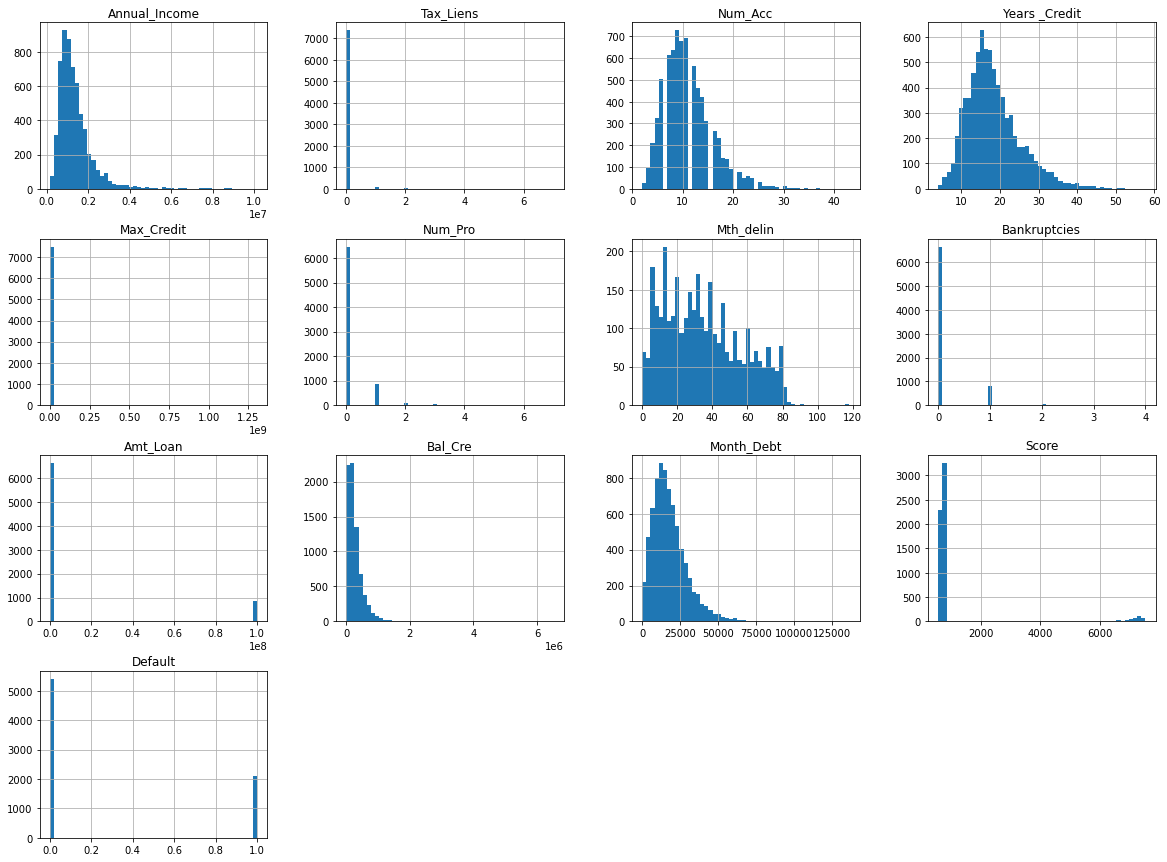

In [12]:
%matplotlib inline 
import matplotlib.pyplot as plt
train.iloc[:,:25].hist(bins=50, figsize=(20,15))
plt.show()

Text(0.5, 1.0, 'Class Distributions \n (0: Good || 1: Bad)')

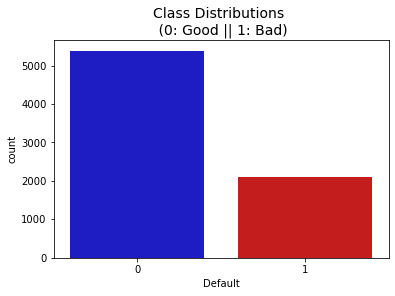

In [39]:
colors = ["#0101DF", "#DF0101"]
sns.countplot('Default', data=train, palette=colors)
plt.title('Class Distributions \n (0: Good || 1: Bad)', fontsize=14)

In [11]:
train['Default'].value_counts()

0    5387
1    2113
Name: Default, dtype: int64

In [343]:
new_df.dtypes

Id                  int64
Home_Ownership     object
Annual_Income     float64
Years_job          object
Tax_Liens           int64
Num_Acc             int64
Years _Credit     float64
Max_Credit          int64
Num_Pro             int64
Mth_delin         float64
Bankruptcies      float64
Purpose            object
Term               object
Amt_Loan            int64
Bal_Cre             int64
Month_Debt          int64
Score             float64
Default             int64
dtype: object

In [ ]:
### VISUALIZATION

<AxesSubplot:ylabel='Home_Ownership'>

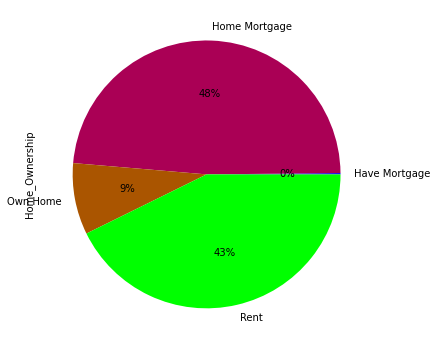

In [353]:
incometype = train.groupby('Home_Ownership')['Id'].count()
incometype.plot.pie(label = ('Home_Ownership'),colormap ='brg',autopct ='%1.0f%%',figsize = (6,10))

<AxesSubplot:ylabel='Term'>

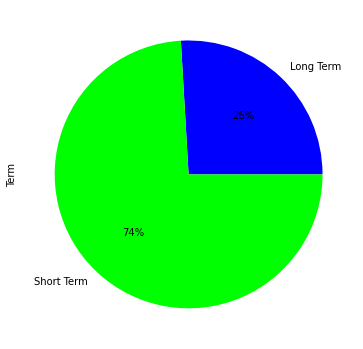

In [354]:
incometype = train.groupby('Term')['Id'].count()
incometype.plot.pie(label = ('Term'),colormap ='brg',autopct ='%1.0f%%',figsize = (6,10))

<AxesSubplot:>

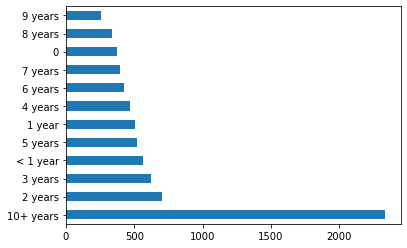

In [355]:
train.Years_job.value_counts(dropna=False).plot(kind='barh')

<AxesSubplot:>

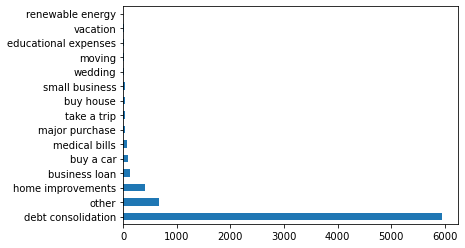

In [356]:
train.Purpose.value_counts(dropna=False).plot(kind='barh')

In [77]:
# Check correlation
corr = train.corr().abs()

<AxesSubplot:>

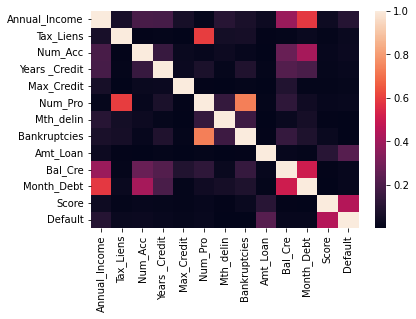

In [78]:
sns.heatmap(corr)

In [ ]:
########################## FEATURE ENGINEERING

In [9]:
## Handle imbalanced data
train['Default'].value_counts()

0    5387
1    2113
Name: Default, dtype: int64

In [10]:
## Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = train.sample(frac=1)

# amount of fraud classes 2113 rows.
fraud_df = df.loc[df['Default'] == 1]
non_fraud_df = df.loc[df['Default'] == 0][:2113]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.shape

(4226, 17)

Text(0.5, 1.0, 'Class Distributions \n (0: Good || 1: Bad)')

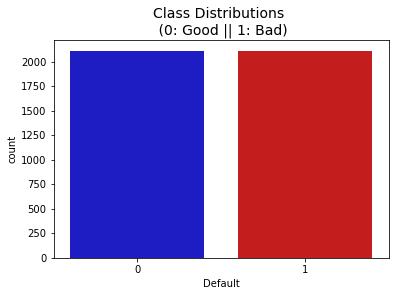

In [11]:
colors = ["#0101DF", "#DF0101"]
sns.countplot('Default', data=new_df, palette=colors)
plt.title('Class Distributions \n (0: Good || 1: Bad)', fontsize=14)

In [12]:
## Calculate IV
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 10

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

In [13]:
final_iv, IV = data_vars(new_df,new_df.Default)
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,Home_Ownership,Have Mortgage,Have Mortgage,7,2.0,0.285714,5.0,0.714286,0.000947,0.002366,-0.916291,0.027862
1,Home_Ownership,Home Mortgage,Home Mortgage,1993,916.0,0.459609,1077.0,0.540391,0.433507,0.509702,-0.161918,0.027862
2,Home_Ownership,Own Home,Own Home,386,192.0,0.497409,194.0,0.502591,0.090866,0.091813,-0.010363,0.027862
3,Home_Ownership,Rent,Rent,1840,1003.0,0.545109,837.0,0.454891,0.474681,0.396119,0.180927,0.027862
4,Annual_Income,175845.0,679440.0,471,268.0,0.569002,203.0,0.430998,0.126834,0.096072,0.277781,0.072742
...,...,...,...,...,...,...,...,...,...,...,...,...
94,Score,735.0,740.0,401,144.0,0.359102,257.0,0.640898,0.068150,0.121628,-0.579263,0.235556
95,Score,741.0,745.0,362,100.0,0.276243,262.0,0.723757,0.047326,0.123994,-0.963174,0.235556
96,Score,746.0,6620.0,333,97.0,0.291291,236.0,0.708709,0.045906,0.111690,-0.889121,0.235556
97,Score,6630.0,7510.0,366,366.0,1.000000,0.0,0.000000,0.173213,0.000000,0.000000,0.235556


In [14]:
IV = IV.sort_values('IV')
sum_iv = IV.loc[IV['IV']>0.02]
sum_iv['VAR_NAME'].tolist()

['Home_Ownership', 'Annual_Income', 'Term', 'Score', 'Amt_Loan']

In [15]:
IV

,VAR_NAME,IV
2,Bal_Cre,0.001101
3,Bankruptcies,0.002260
14,Years _Credit,0.007613
12,Tax_Liens,0.008377
8,Num_Acc,0.008898
9,Num_Pro,0.009134
6,Month_Debt,0.009609
5,Max_Credit,0.013659
15,Years_job,0.013792
7,Mth_delin,0.014067


In [16]:
sum_iv = IV.loc[IV['IV']>0.01]
sum_iv['VAR_NAME'].tolist()

['Max_Credit',
 'Years_job',
 'Mth_delin',
 'Purpose',
 'Home_Ownership',
 'Annual_Income',
 'Term',
 'Score',
 'Amt_Loan']

In [14]:
df = new_df[['Purpose', 'Home_Ownership', 'Term', 'Years_job', 'Mth_delin', 'Annual_Income', 'Score', 'Amt_Loan', 'Max_Credit', 'Bal_Cre'
,'Default']]

In [15]:
fl = df.select_dtypes(include = ['int64','float64'])
fl

,Mth_delin,Annual_Income,Score,Amt_Loan,Max_Credit,Bal_Cre,Default
1428,24.0,NaN,NaN,242066,203236,124279,1
2917,NaN,NaN,NaN,534886,1120240,744971,0
6847,53.0,NaN,NaN,263032,199430,132449,0
3370,11.0,NaN,NaN,343970,1222034,282853,0
4526,NaN,856197.0,719.0,170742,240284,105222,0
...,...,...,...,...,...,...,...
3082,NaN,3997334.0,691.0,99999999,1284602,495919,0
3858,24.0,NaN,NaN,116996,212168,107559,1
7055,7.0,1458915.0,744.0,337854,1579248,331436,0
6400,NaN,965770.0,744.0,402578,1119008,351766,0


In [16]:
ob = df.select_dtypes(include = 'object')
ob

,Purpose,Home_Ownership,Term,Years_job
1428,debt consolidation,Rent,Long Term,10+ years
2917,debt consolidation,Rent,Long Term,6 years
6847,home improvements,Own Home,Short Term,1 year
3370,debt consolidation,Rent,Short Term,10+ years
4526,debt consolidation,Rent,Short Term,7 years
...,...,...,...,...
3082,debt consolidation,Home Mortgage,Short Term,8 years
3858,other,Rent,Short Term,1 year
7055,debt consolidation,Home Mortgage,Short Term,2 years
6400,debt consolidation,Own Home,Short Term,10+ years


In [38]:
corr = fl.corr()

In [39]:
######## Correlation between independent varibles
#remove one of two features that have a correlation higher than 0.7
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.7:
            if columns[j]:
                columns[j] = False
selected_columns = fl.columns[columns]
fl = fl[selected_columns]

In [40]:
fl

,Mth_delin,Annual_Income,Score,Amt_Loan,Max_Credit,Bal_Cre,Default
4199,81.0,855266.0,721.0,308088,332266,220647,1
209,32.0,2685536.0,744.0,99999999,1353286,178809,0
3532,61.0,1567215.0,717.0,524722,601062,397613,0
5576,27.0,1150488.0,733.0,473726,501204,148029,0
4867,NaN,759012.0,718.0,99999999,599060,226613,0
...,...,...,...,...,...,...,...
4773,NaN,2901737.0,747.0,53548,6648488,2325467,0
5173,NaN,NaN,NaN,172436,274692,129770,1
3271,NaN,1305794.0,706.0,107998,17270,13737,0
6705,NaN,1649238.0,717.0,786324,294492,117762,0


In [17]:
## one-hot encoding
cat_col = ob.columns
# convert all cols to numeric 
ob[cat_col] = ob[cat_col].apply(lambda x: pd.factorize(x)[0])

In [18]:
dat = pd.concat([ob,fl],1)

In [19]:
## Replacing nan with median value
dat =dat.fillna(dat.median())

In [20]:
# Spliting dataset 
X = dat.drop('Default',1)
y = dat[['Default']]

In [21]:
from sklearn.model_selection import train_test_split

ids = np.arange(X.shape[0])
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y, ids, test_size = 0.2, stratify = y, shuffle = True,
                                                                       random_state = 0)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (3380, 10)
X_test shape:  (846, 10)
y_train shape:  (3380, 1)
y_test shape:  (846, 1)


In [22]:
# import the library - GridSearchCv
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [23]:
## Using StandardScaler and PCA
std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()

In [24]:
## Using Pipelinie for GridSearchCV
pipe = Pipeline(steps = [('std_slc',std_slc),('pca',pca),('dec_tree',dec_tree)])
# n_components signifies the number of components to keep after reducing the dimension
n_components = list(range(1,X.shape[1]+1,1))
criterion = ['gini','entropy']
max_depth = [6,8,10,12]
parameters = dict(pca__n_components=n_components,
                  dec_tree__criterion = criterion, 
                  dec_tree__max_depth = max_depth)

In [25]:
n_components = list(range(1,X.shape[1]+1,1))

In [26]:
## Using GridSearchCV and printing results
clf_GS = GridSearchCV(pipe,parameters)
clf_GS.fit(X,y)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [6, 8, 10, 12],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [27]:
print('Best Criterion:',clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:',clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number of Components:',clf_GS.best_estimator_.get_params()['pca__n_components'])
print();print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: gini
Best max_depth: 6
Best Number of Components: 9

DecisionTreeClassifier(max_depth=6)


In [33]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0)
# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [34]:
## Predict on the Validation set
y_pred_gini = clf_gini.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
y_pred_train_gini = clf_gini.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion entropy index: 0.6879
Training-set accuracy score: 0.6820


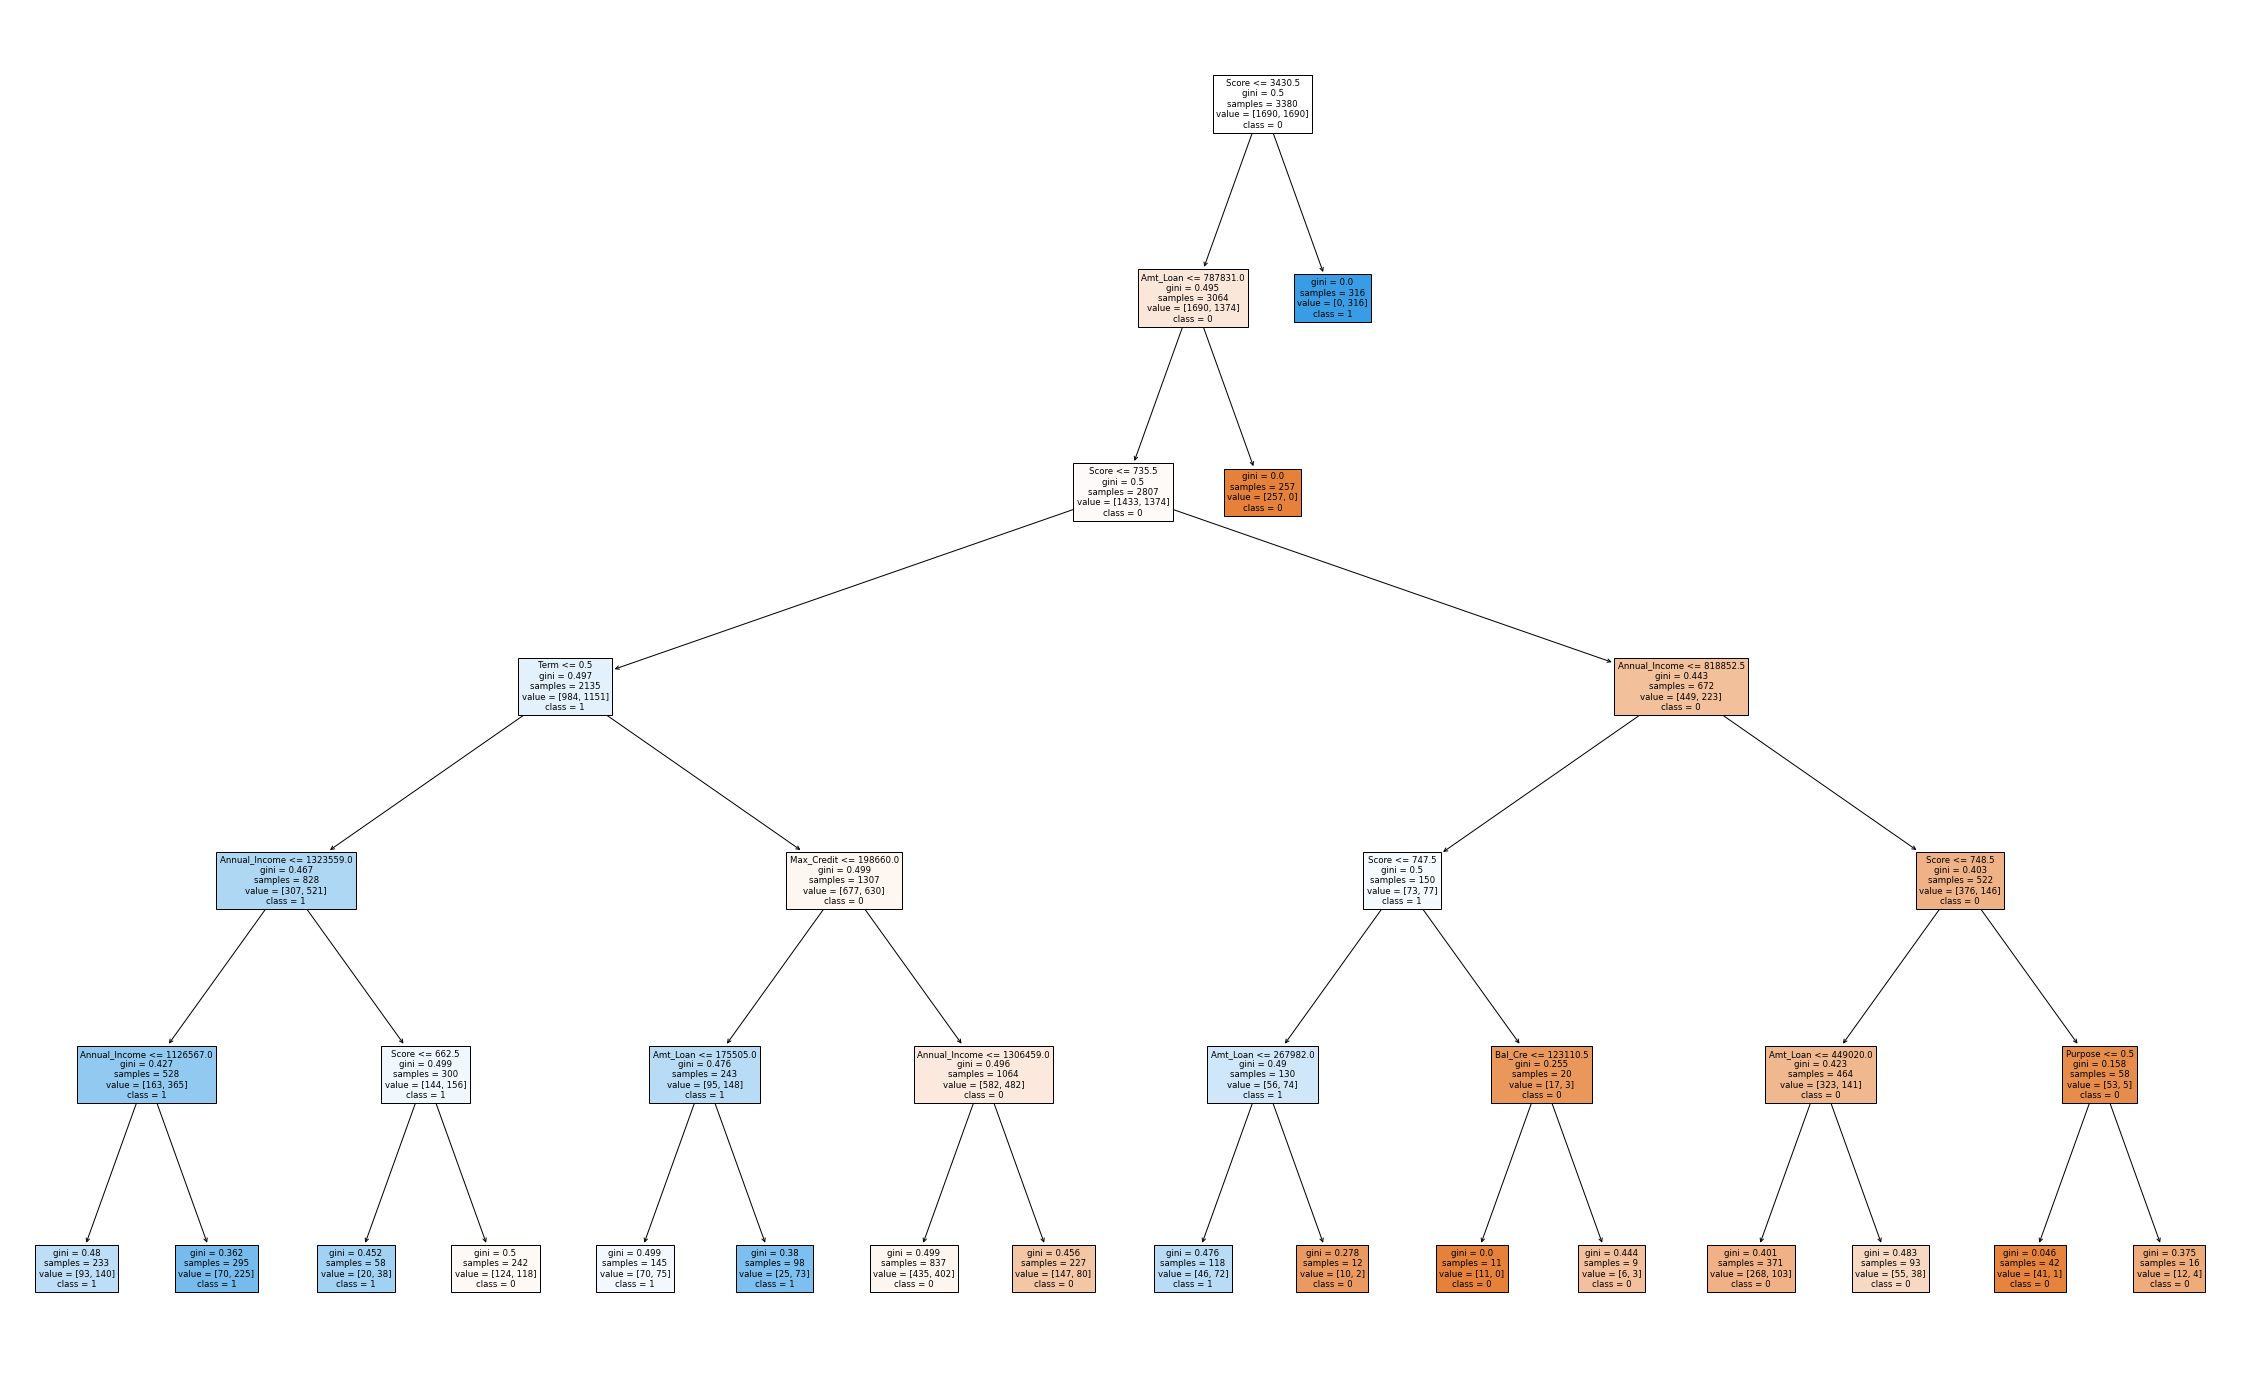

In [32]:
fig = plt.figure(figsize=(40,25))
_ = tree.plot_tree(clf_entropy, 
                   feature_names=X_train.columns,  
                   class_names=['0', "1"],
                   filled=True)

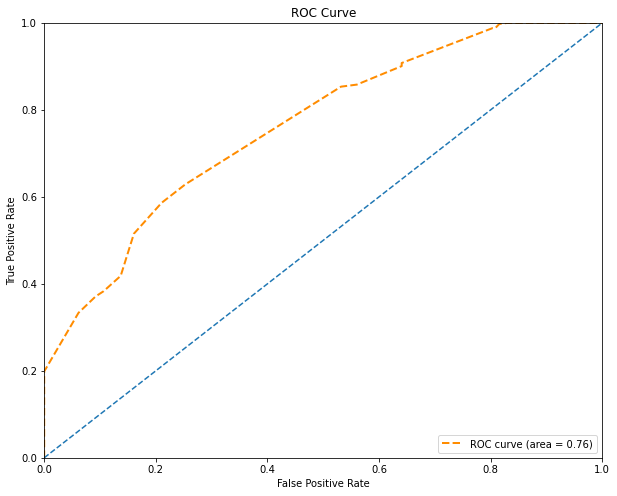

In [36]:
from sklearn.metrics import roc_curve, auc

y_pred_prob_test = clf_gini.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

_plot_roc_curve(fpr, tpr, thres, roc_auc)

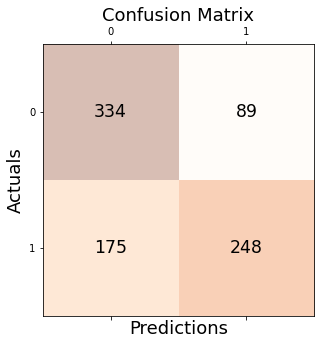

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_gini)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [38]:
print('Precision: %.3f' % precision_score(y_test, y_pred_gini))
print('Recall: %.3f' % recall_score(y_test, y_pred_gini))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_gini))

Precision: 0.736
Recall: 0.586
F1 Score: 0.653


In [ ]:
## OUT-OF-SAMPLE

In [39]:
test.columns

Index(['Id', 'Home_Ownership', 'Annual_Income', 'Years_job', 'Tax_Liens',
       'Num_Acc', 'Years _Credit', 'Max_Credit', 'Num_Pro', 'Mth_delin',
       'Bankruptcies', 'Purpose', 'Term', 'Amt_Loan', 'Bal_Cre', 'Month_Debt',
       'Score'],
      dtype='object')

In [40]:
ob = test.select_dtypes(include = 'object')

In [41]:
cat_col = ob.columns
# convert all cols to numeric 
ob[cat_col] = ob[cat_col].apply(lambda x: pd.factorize(x)[0])

In [42]:
fl = test.select_dtypes(include = ['int64','float64'])

In [43]:
test1 = pd.concat([fl,ob],1)

In [44]:
test = test1.fillna(test1.median())

In [45]:
test

,Id,Annual_Income,Tax_Liens,Num_Acc,Years _Credit,Max_Credit,Num_Pro,Mth_delin,Bankruptcies,Amt_Loan,Bal_Cre,Month_Debt,Score,Home_Ownership,Years_job,Purpose,Term
0,7500,1178475.0,0,9,12.5,220968,0,70.0,0.0,162470,105906,6813,731.0,0,0,0,0
1,7501,231838.0,0,6,32.7,55946,0,8.0,0.0,78298,46037,2318,699.0,0,1,1,0
2,7502,1152540.0,0,10,13.7,204600,0,30.0,0.0,200178,146490,18729,7260.0,1,2,0,0
3,7503,1220313.0,0,16,17.0,456302,0,70.0,0.0,217382,213199,27559,739.0,1,3,0,0
4,7504,2340952.0,0,11,23.6,1207272,0,30.0,0.0,777634,425391,42605,706.0,1,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,9995,1020053.0,0,14,29.1,559152,1,68.0,1.0,99999999,162735,15046,745.0,1,3,0,0
2496,9996,1178475.0,0,15,17.0,1737780,0,77.0,0.0,468512,1439269,32996,731.0,1,7,0,0
2497,9997,1171806.0,0,48,12.8,1706430,0,30.0,0.0,430496,676438,36912,695.0,1,7,0,0
2498,9998,723520.0,0,14,28.8,945780,0,30.0,0.0,257774,391248,13506,744.0,0,3,0,0


In [46]:
test= test[['Purpose', 'Home_Ownership', 'Term', 'Years_job', 'Mth_delin',
       'Annual_Income', 'Score', 'Amt_Loan', 'Max_Credit', 'Bal_Cre']]

In [47]:
oos_pred =clf_gini.predict(test)

In [48]:
oos_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [49]:
sample

,Id,Credit Default
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
2495,2496,0
2496,2497,0
2497,2498,0
2498,2499,0


In [50]:
oos = sample['Credit Default']
oos

0       0
1       0
2       0
3       0
4       0
       ..
2495    0
2496    0
2497    0
2498    0
2499    0
Name: Credit Default, Length: 2500, dtype: int64

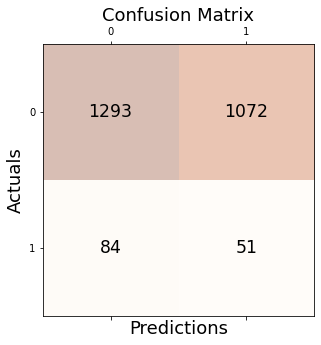

In [51]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true=oos, y_pred=oos_pred)
# Print the confusion matrix using Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [52]:
print('Precision: %.3f' % precision_score(oos, oos_pred))
print('Recall: %.3f' % recall_score(oos, oos_pred))
print('F1 Score: %.3f' % f1_score(oos, oos_pred))

Precision: 0.045
Recall: 0.378
F1 Score: 0.081


In [53]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(oos, oos_pred)))

Model accuracy score with criterion gini index: 0.5376


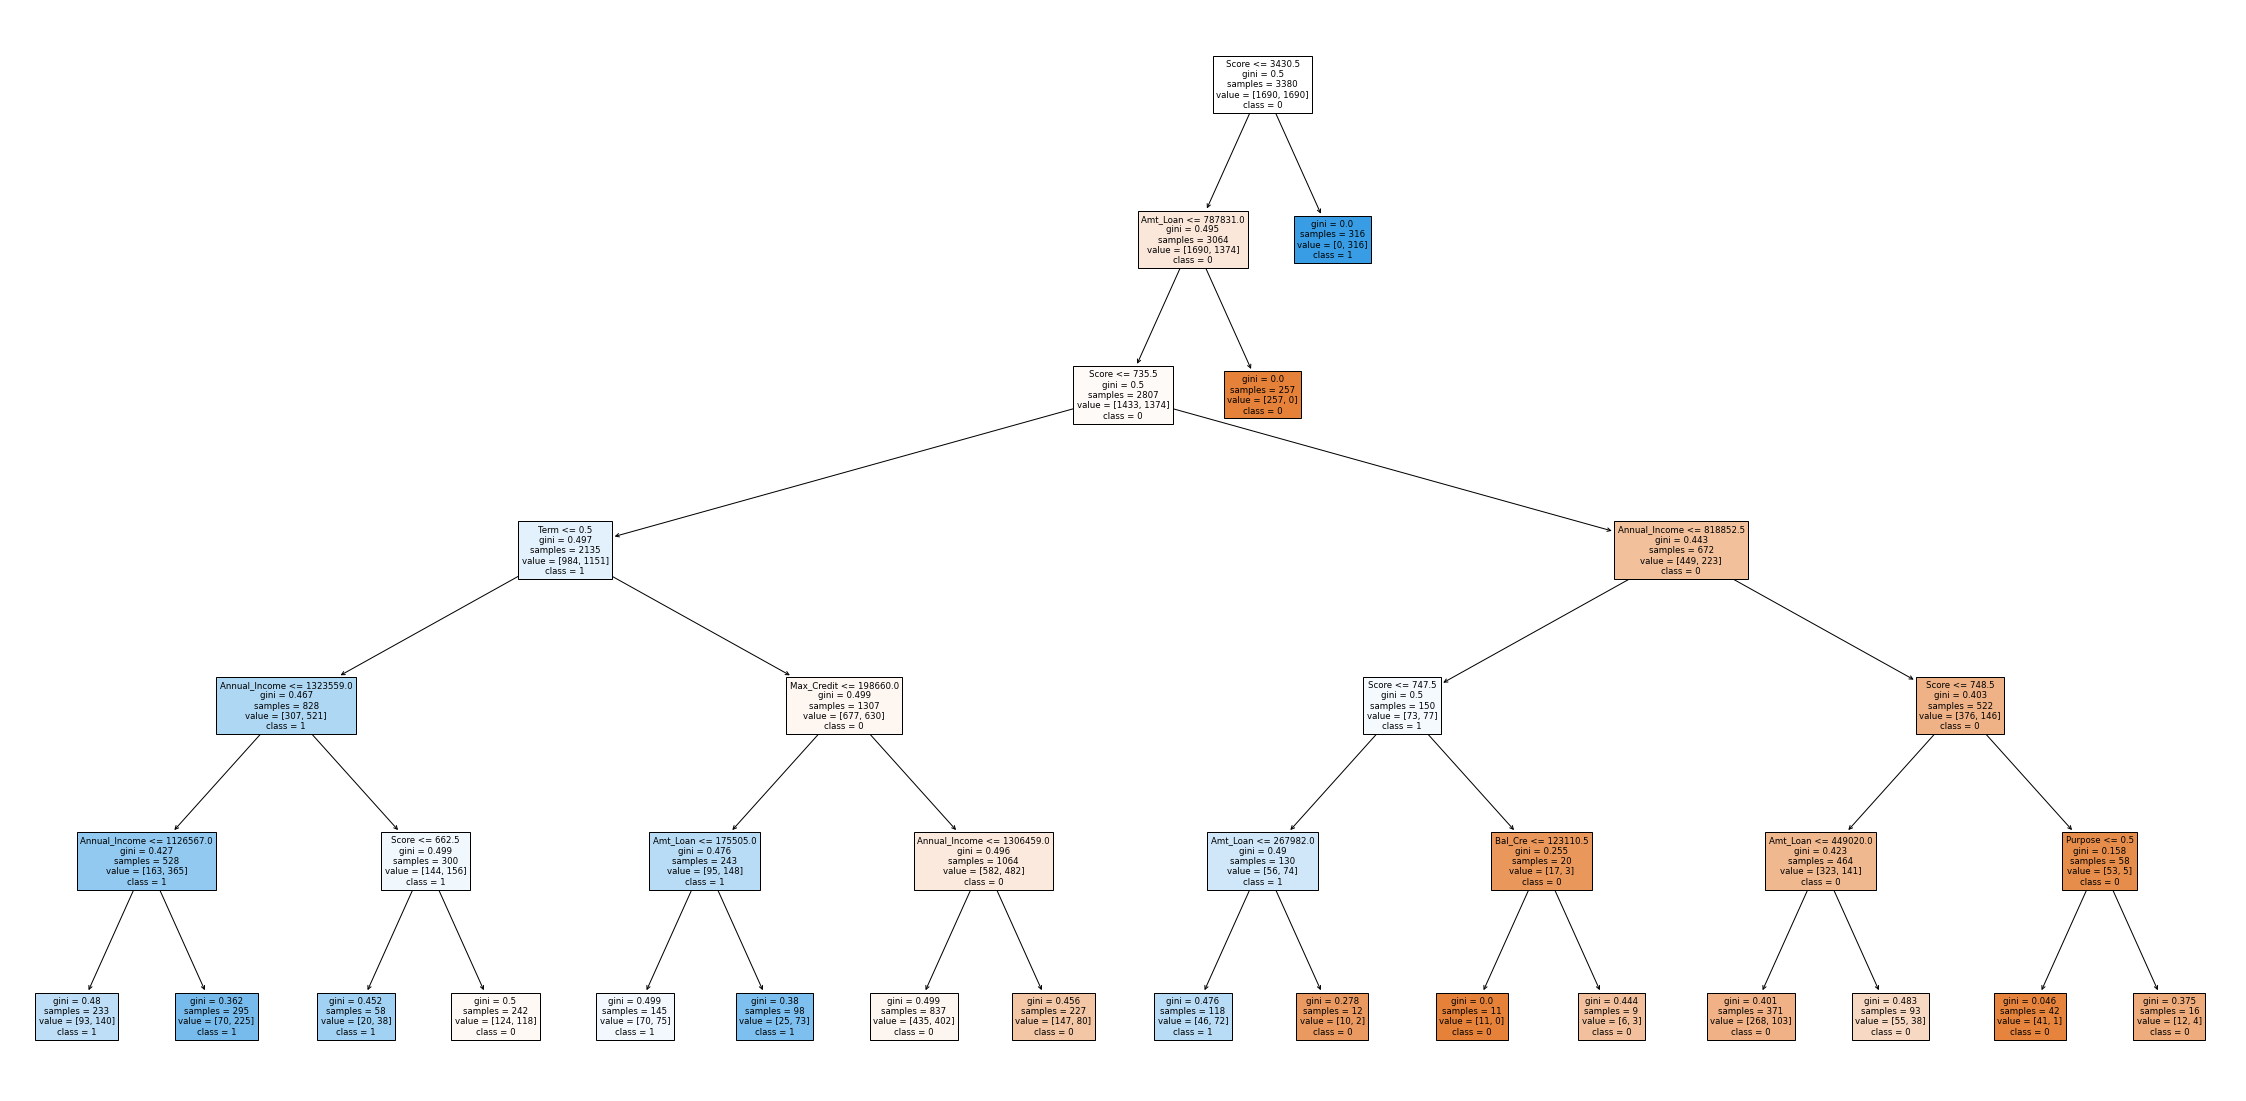

In [54]:
fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(clf_entropy, 
                   feature_names=test.columns,  
                   class_names=['0', "1"],
                   filled=True)

In [ ]:
## Save the model for later use

In [55]:
import pickle as pkl
#Step 1: Save the model as a pickle string. 
saved_model = pkl.dumps(clf_entropy) 
  
#Step 2: Load the saved model 
clf_entropy_from_pickle = pkl.loads(saved_model) 
  
#Step 3: Use the loaded model to make predictions 
clf_entropy_from_pickle.predict(test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [56]:
a = clf_entropy_from_pickle.predict(test)

In [57]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(oos, a)))

Model accuracy score with criterion gini index: 0.5376
